In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle

In [2]:
import networkx as nx

In [3]:
rental_point = pd.read_csv('./data/public_bike_rental_point.csv', encoding='cp949')
rental_data = pd.read_csv('./data/public_bike_rental_log.csv', encoding='cp949')

In [4]:
# node
rental_point

대여소_구  대여소ID              대여소명                    대여소주소         위도  \
0      마포구    101  101. (구)합정동 주민센터       서울특별시 마포구 동교로8길 58  37.549561   
1      마포구    102   102. 망원역 1번출구 앞        서울특별시 마포구 월드컵로 72  37.555649   
2      마포구    103   103. 망원역 2번출구 앞        서울특별시 마포구 월드컵로 79  37.554951   
3      마포구    104   104. 합정역 1번출구 앞         서울특별시 마포구 양화로 59  37.550629   
4      마포구    105   105. 합정역 5번출구 앞         서울특별시 마포구 양화로 48  37.550007   
...    ...    ...               ...                      ...        ...   
1535   종로구    464            삼청동 골목               종로구 팔판길 46  37.584190   
1536   관악구   2185           대학동 고시촌     서울특별시 관악구 신림로 97 밀라트  37.470467   
1537   서초구   2265   2265. 이수고가차도 남단  서울특별시 서초구 동작대로 204 청남빌딩  37.494743   
1538   종로구    465       465. 삼청공원 앞      서울특별시 종로구 삼청동 25-32  37.587605   
1539   종로구    664        서울시립대 대학본부  동대문구 서울시립대로 163 서울시립대학교  37.584129   

              경도            기준시작일자  거치대수  
0     126.905754  2015-09-06 23:40     5  
1     126.910629  2015-09-06 23:42    20  
2     126.910835  2015-09-06 23:43    14  
3     126.914986  2015-09-06 23:44    13  
4     126.914825  2015-09-06 23:45     5  
...          ...               ...   ...  
1535  126.981697        2019.08.16    10  
1536  126.938652        2019.09.26    10  
1537  126.983063  2017-08-09 11:16    10  
1538  126.983597        2019.11.20     5  
1539  127.057938        2019.11.20    10  

[1540 rows x 8 columns]

In [5]:
# edge
rental_data

자전거번호                 대여일시  대여 대여소번호          대여 대여소명  대여거치대  \
0        SPB-33273  2020-06-01 00:03:05      1050       둔촌역 3번 출입구      0   
1        SPB-30703  2020-06-01 00:00:46      1132         등촌역 7번출구      0   
2        SPB-31969  2020-06-01 00:02:43      1306       한성대입구역2번출구      0   
3        SPB-19763  2020-06-01 00:00:16       956          응암시장교차로      8   
4        SPB-32949  2020-06-01 00:04:20       709     신정3동 현장민원실 앞      0   
...            ...                  ...       ...              ...    ...   
1755041  SPB-14356  2020-06-30 23:55:00      1160      양천향교역 7번출구앞      2   
1755042  SPB-14454  2020-06-30 18:55:01      1235     잠실트리지움310동 옆      3   
1755043  SPB-12680  2020-06-30 13:01:33      1346      길음8골어린이공원 옆      1   
1755044  SPB-32402  2020-06-30 16:45:32      1956       도야미리숯불갈비 앞      0   
1755045  SPB-21598  2020-06-30 23:52:23      1008  암사역 3번출구(국민은행앞)      4   

                        반납일시  반납대여소번호             반납대여소명  반납거치대  이용시간  \
0        2020-06-01 00:05:59     1078              둔촌사거리      0     3   
1        2020-06-01 00:06:53     1169          염창역 1번 출구      0     6   
2        2020-06-01 00:06:59      388            동성중학교 앞      0     4   
3        2020-06-01 00:08:25      939           은평구청 교차로      6     7   
4        2020-06-01 00:08:53      712         강월초교입구 사거리      0     5   
...                      ...      ...                ...    ...   ...   
1755041  2020-07-01 01:55:02     1160        양천향교역 7번출구앞      1   119   
1755042  2020-07-01 02:46:48     1221        삼전사거리 포스코더샵      4   471   
1755043  2020-07-01 02:50:27     1347  길음래미안아파트817동 상가 앞      1    15   
1755044  2020-07-01 08:04:52     1956         도야미리숯불갈비 앞      0   919   
1755045  2020-07-01 09:07:47     1008    암사역 3번출구(국민은행앞)      4    42   

             이용거리  
0            0.00  
1            0.00  
2            0.00  
3         1340.00  
4            0.00  
...           ...  
1755041  18060.00  
1755042    870.00  
1755043   7230.00  
1755044  39786.76  
1755045    310.00  

[1755046 rows x 11 columns]

In [6]:
## Edge 관련 데이터 확인

# unique한 source, target의 쌍 개수
ls = list(zip(rental_data['대여 대여소번호'],rental_data['반납대여소번호']))
print('unique한 source, target 쌍의 개수 : '+str(len(set(ls))))

print('================')

print('이용시간 평균 : ' + str(np.mean(rental_data['이용시간'])))
print('이용시간 최소값 : ' + str(min(rental_data['이용시간'])))
print('이용시간 최대값 : ' + str(max(rental_data['이용시간'])))
print('이용시간 표준편차 : ' + str(np.std(rental_data['이용시간'])))

print('================')

print('이용거리 평균 : ' + str(np.mean(rental_data['이용거리'])))
print('이용거리 최소값 : ' + str(min(rental_data['이용거리'])))
print('이용거리 최대값 : ' + str(max(rental_data['이용거리'])))
print('이용거리 표준편차 : ' + str(np.std(rental_data['이용거리'])))

unique한 source, target 쌍의 개수 : 263664
이용시간 평균 : 30.87273723879602
이용시간 최소값 : 1
이용시간 최대값 : 2423
이용시간 표준편차 : 31.94805304991121
이용거리 평균 : 1805.7229221000389
이용거리 최소값 : 0.0
이용거리 최대값 : 210540.0
이용거리 표준편차 : 4632.621189096237


## node 및 edge 처리

edge 파일에 있는 모든 node가 node 파일에 존재하도록 edge 파일에서 아닌 행 제거

In [7]:
index = [] # edge에 있는 node가 모두 node 파일에 있는 경우를 담기 위한 리스트
point = rental_point['대여소ID'].values

for i in range(len(rental_data)):
    if (rental_data['대여 대여소번호'][i] in point) and (rental_data['반납대여소번호'][i] in point):
        index.append(i)

In [8]:
rental_data = rental_data.loc[index,:]
rental_data.index = range(len(rental_data))
rental_data

자전거번호                 대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0        SPB-30703  2020-06-01 00:00:46      1132           등촌역 7번출구      0   
1        SPB-31969  2020-06-01 00:02:43      1306         한성대입구역2번출구      0   
2        SPB-19763  2020-06-01 00:00:16       956            응암시장교차로      8   
3        SPB-32949  2020-06-01 00:04:20       709       신정3동 현장민원실 앞      0   
4        SPB-33628  2020-06-01 00:00:34      1153  발산역 1번, 9번 인근 대여소      0   
...            ...                  ...       ...                ...    ...   
1562519  SPB-14356  2020-06-30 23:55:00      1160        양천향교역 7번출구앞      2   
1562520  SPB-14454  2020-06-30 18:55:01      1235       잠실트리지움310동 옆      3   
1562521  SPB-12680  2020-06-30 13:01:33      1346        길음8골어린이공원 옆      1   
1562522  SPB-32402  2020-06-30 16:45:32      1956         도야미리숯불갈비 앞      0   
1562523  SPB-21598  2020-06-30 23:52:23      1008    암사역 3번출구(국민은행앞)      4   

                        반납일시  반납대여소번호             반납대여소명  반납거치대  이용시간  \
0        2020-06-01 00:06:53     1169          염창역 1번 출구      0     6   
1        2020-06-01 00:06:59      388            동성중학교 앞      0     4   
2        2020-06-01 00:08:25      939           은평구청 교차로      6     7   
3        2020-06-01 00:08:53      712         강월초교입구 사거리      0     5   
4        2020-06-01 00:09:35     1125       명덕고교입구(영종빌딩)      0     9   
...                      ...      ...                ...    ...   ...   
1562519  2020-07-01 01:55:02     1160        양천향교역 7번출구앞      1   119   
1562520  2020-07-01 02:46:48     1221        삼전사거리 포스코더샵      4   471   
1562521  2020-07-01 02:50:27     1347  길음래미안아파트817동 상가 앞      1    15   
1562522  2020-07-01 08:04:52     1956         도야미리숯불갈비 앞      0   919   
1562523  2020-07-01 09:07:47     1008    암사역 3번출구(국민은행앞)      4    42   

             이용거리  
0            0.00  
1            0.00  
2         1340.00  
3            0.00  
4            0.00  
...           ...  
1562519  18060.00  
1562520    870.00  
1562521   7230.00  
1562522  39786.76  
1562523    310.00  

[1562524 rows x 11 columns]

In [9]:
# Self Loop 제거

rental_data = rental_data.drop(rental_data[rental_data['대여 대여소번호']==rental_data['반납대여소번호']].index, axis=0)
rental_data.index = range(len(rental_data))
rental_data

자전거번호                 대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0        SPB-30703  2020-06-01 00:00:46      1132           등촌역 7번출구      0   
1        SPB-31969  2020-06-01 00:02:43      1306         한성대입구역2번출구      0   
2        SPB-19763  2020-06-01 00:00:16       956            응암시장교차로      8   
3        SPB-32949  2020-06-01 00:04:20       709       신정3동 현장민원실 앞      0   
4        SPB-33628  2020-06-01 00:00:34      1153  발산역 1번, 9번 인근 대여소      0   
...            ...                  ...       ...                ...    ...   
1368844  SPB-32165  2020-06-30 22:06:58      2119           중앙동 동진빌딩      0   
1368845  SPB-32376  2020-06-30 23:28:03      1966        한마을아파트 정문상가      0   
1368846  SPB-31686  2020-06-30 23:25:40       103         망원역 2번출구 앞      0   
1368847  SPB-14454  2020-06-30 18:55:01      1235       잠실트리지움310동 옆      3   
1368848  SPB-12680  2020-06-30 13:01:33      1346        길음8골어린이공원 옆      1   

                        반납일시  반납대여소번호             반납대여소명  반납거치대  이용시간  \
0        2020-06-01 00:06:53     1169          염창역 1번 출구      0     6   
1        2020-06-01 00:06:59      388            동성중학교 앞      0     4   
2        2020-06-01 00:08:25      939           은평구청 교차로      6     7   
3        2020-06-01 00:08:53      712         강월초교입구 사거리      0     5   
4        2020-06-01 00:09:35     1125       명덕고교입구(영종빌딩)      0     9   
...                      ...      ...                ...    ...   ...   
1368844  2020-07-01 01:10:36     2173              당곡사거리      0   184   
1368845  2020-07-01 01:11:57      112            극동방송국 앞      0   104   
1368846  2020-07-01 01:44:24      151           망원1동주민센터      0   139   
1368847  2020-07-01 02:46:48     1221        삼전사거리 포스코더샵      4   471   
1368848  2020-07-01 02:50:27     1347  길음래미안아파트817동 상가 앞      1    15   

             이용거리  
0            0.00  
1            0.00  
2         1340.00  
3            0.00  
4            0.00  
...           ...  
1368844  11136.53  
1368845  12893.96  
1368846   2301.87  
1368847    870.00  
1368848   7230.00  

[1368849 rows x 11 columns]

## Directed Graph 생성

In [10]:
rental_mg = nx.MultiGraph()

for i in rental_point.index:
    rental_mg.add_node(rental_point.at[i,'대여소ID'],
               label = rental_point.at[i, '대여소명'],
               latitude = rental_point.at[i,'위도'],
               longitude = rental_point.at[i,'경도'],
               holder = rental_point.at[i,'거치대수'])
    
for i in rental_data.index:
    rental_mg.add_edge(rental_data.at[i,'대여 대여소번호'],
               rental_data.at[i,'반납대여소번호'],
               time = rental_data.at[i,'이용시간'],
               distance = rental_data.at[i,'이용거리'],
               weight = 1) # weight 인위적으로 추가

In [11]:
rental_g = nx.DiGraph()

# 노드 옮겨주기
rental_g.add_nodes_from(rental_mg.nodes())

# 엣지 옮겨주기
for s, t, k, d in rental_mg.edges(keys=True, data=True):
    # 만약 중복 엣지가 있는 경우, time, distance, weight를 쌓아간다
    if rental_g.has_edge(s,t) == True:
        rental_g[s][t]['time'] += d['time']
        rental_g[s][t]['distance'] += d['distance']
        rental_g[s][t]['weight'] += d['weight']
    else:
        rental_g.add_edge(s, t, time=d['time'], distance=d['distance'], weight=d['weight'])

In [13]:
# Save
with open('rental_g.pickle','wb') as fw:
    pickle.dump(rental_g, fw)

## 시각화

In [59]:
# Graph Layout
layout = {}

for i in rental_point.index:
    ID = rental_point.at[i, '대여소ID'] # key
    lat = rental_point.at[i,'위도']
    long = rental_point.at[i, '경도']
    layout[ID] = np.array([long, lat]) # 순서 주의!! 경도가 x축, 위도가 y축임

In [60]:
# Custom Colormap

from matplotlib.colors import LinearSegmentedColormap

# get colormap
ncolors = 256
color_array = plt.get_cmap('YlGnBu')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='rental_cmap',colors=color_array)

# register this new colormap with matplotlib
plt.register_cmap(cmap=map_object)

# show some example data
f,ax = plt.subplots()
h = ax.imshow(np.random.rand(100,100),cmap='rental_cmap')
plt.colorbar(mappable=h)

In [61]:
edges = rental_g.edges()
times = [rental_g[s][t]['time'] for s,t in edges]
distances = [rental_g[s][t]['distance'] for s,t in edges]
weights = [rental_g[s][t]['weight'] for s,t in edges]

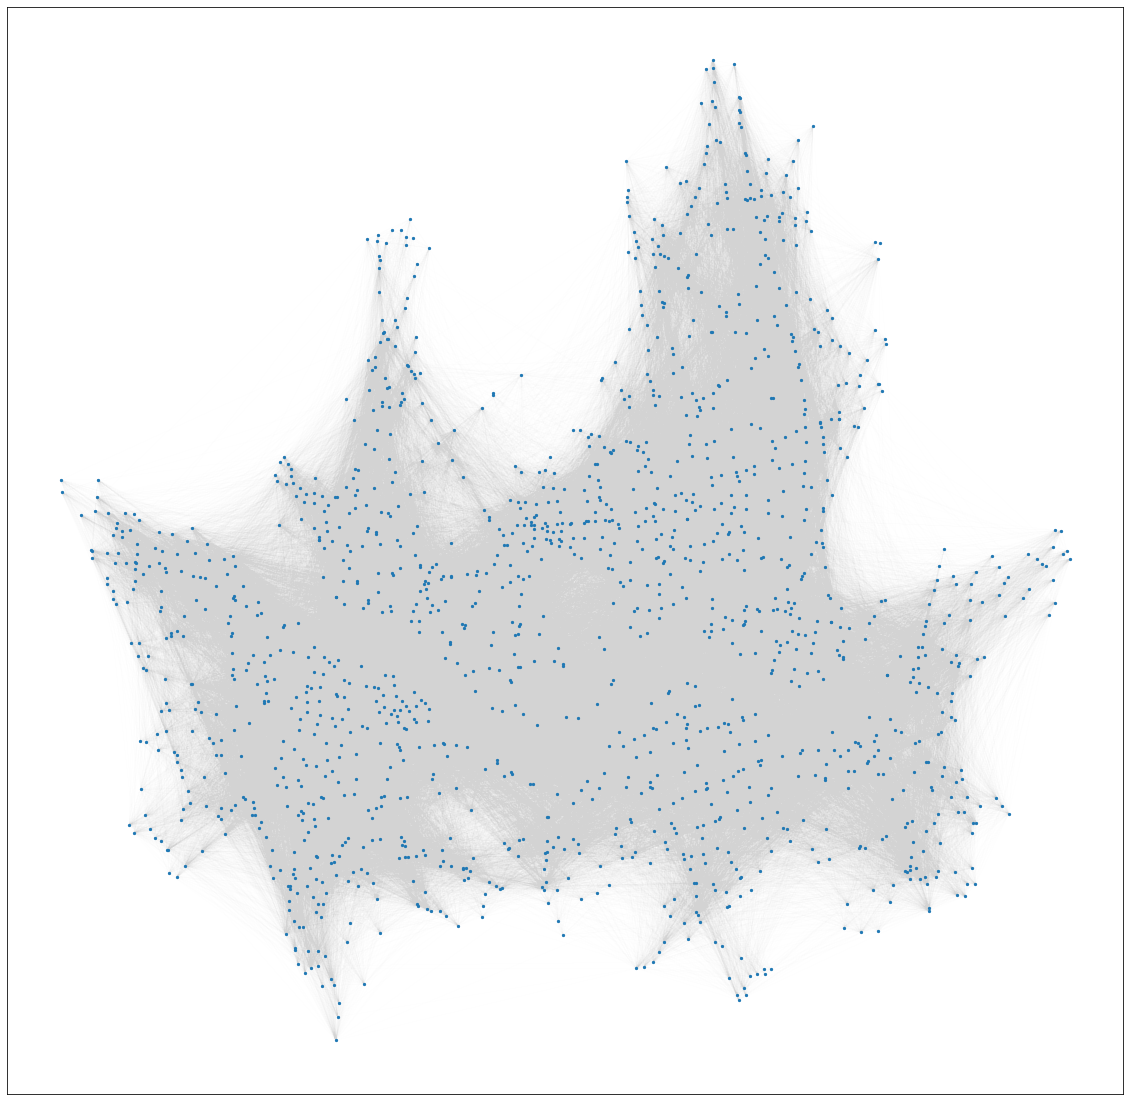

In [62]:
# base graph

plt.figure(figsize=(20,20))
nx.draw_networkx(rental_g, layout, node_size=5, width=0.01, with_labels=False, arrows=False, edge_color='lightgrey')
plt.show()

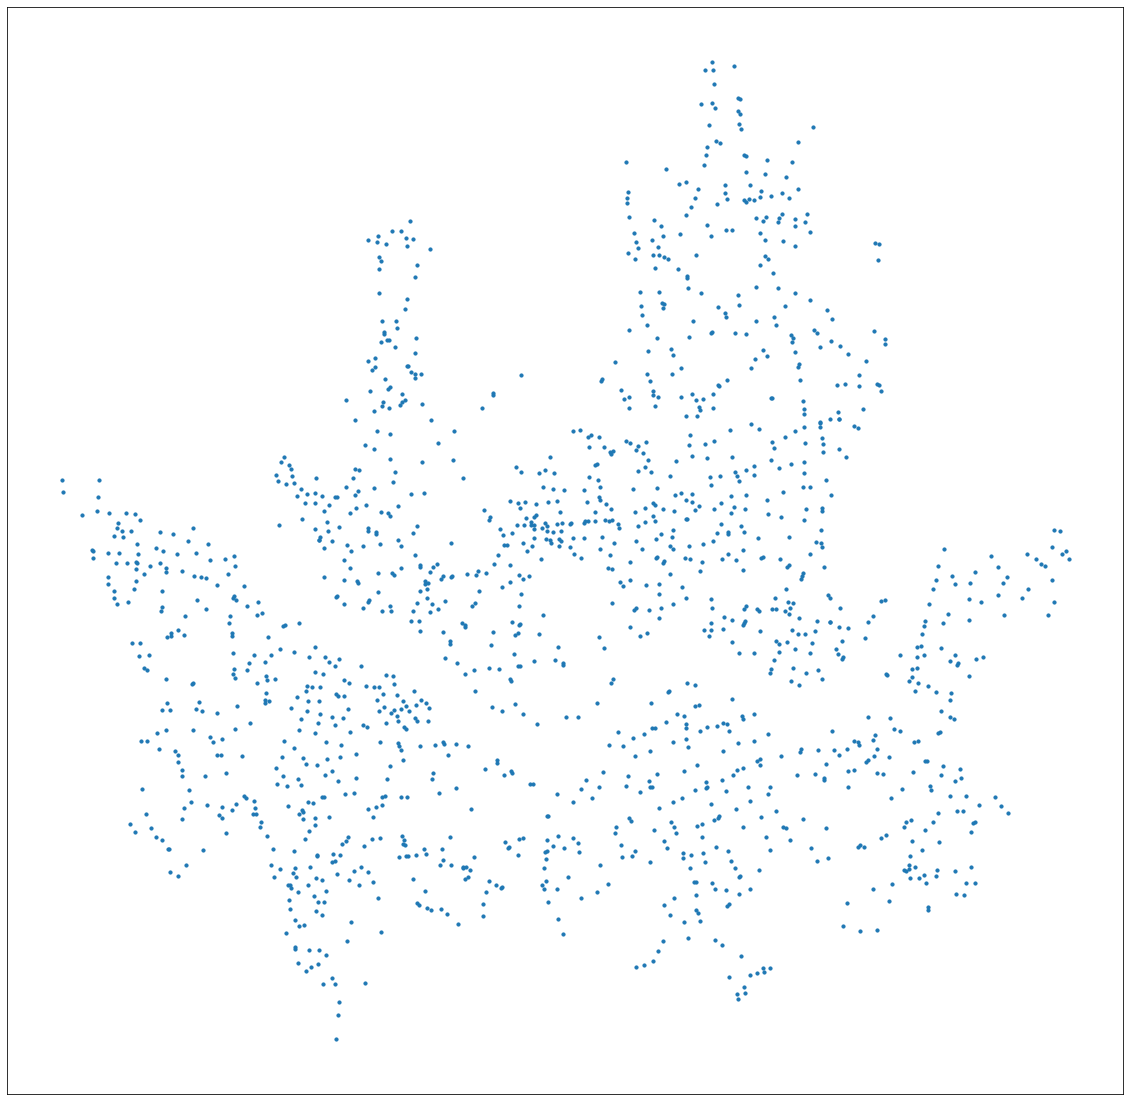

In [75]:
# node graph

plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(rental_g, layout, node_size=10)
plt.show()

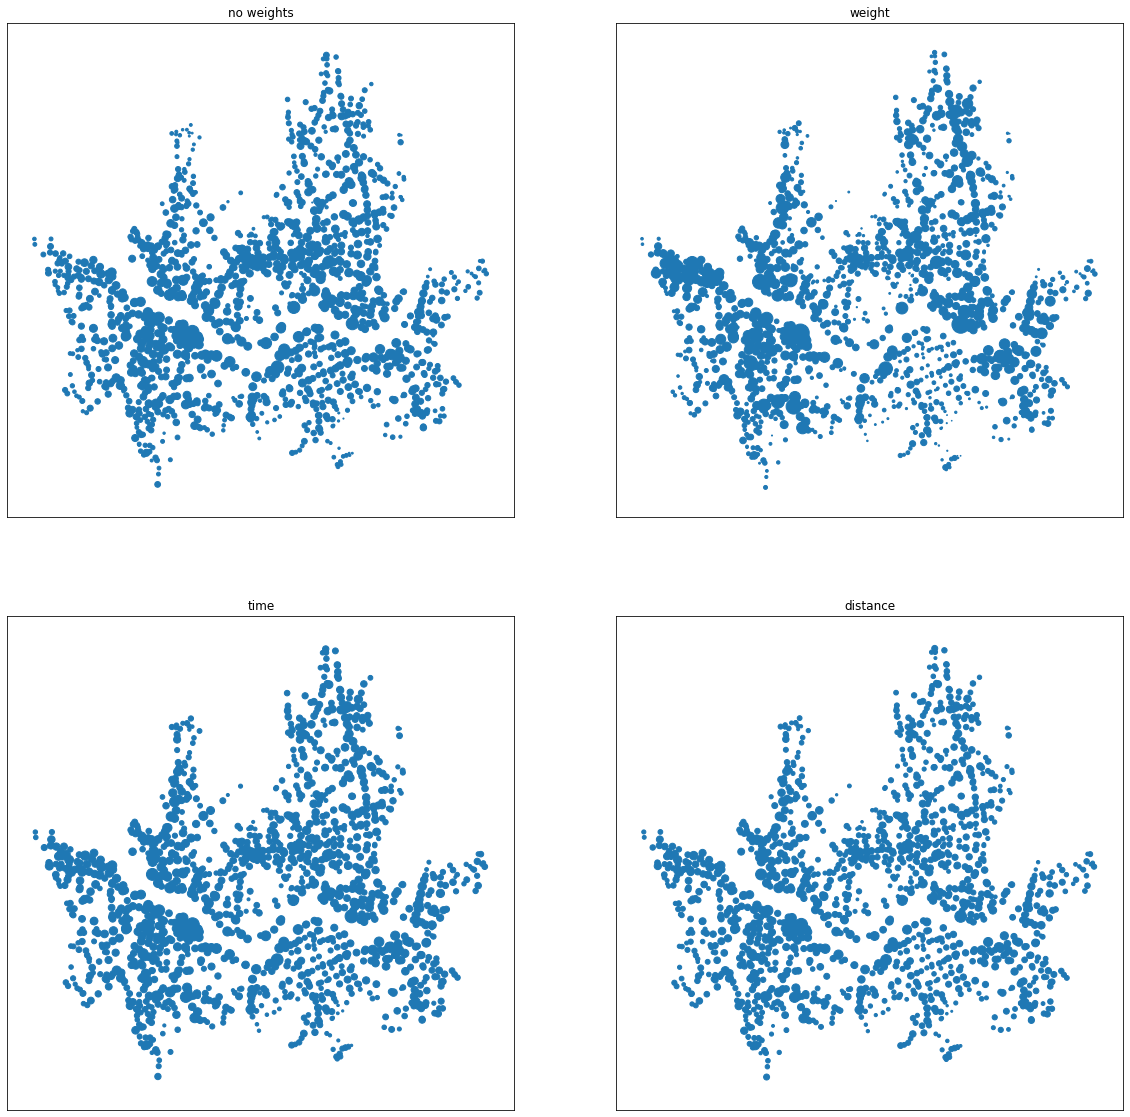

In [94]:
# degree

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
nx.draw_networkx_nodes(rental_g, layout, node_size=[d*0.2 for n,d in rental_g.degree()])
plt.title('no weights')
plt.subplot(2,2,2)
nx.draw_networkx_nodes(rental_g, layout, node_size=[d*0.02 for n,d in rental_g.degree(weight='weight')])
plt.title('weight')
plt.subplot(2,2,3)
nx.draw_networkx_nodes(rental_g, layout, node_size=[math.sqrt(d)*0.2 for n,d in rental_g.degree(weight='time')])
plt.title('time')
plt.subplot(2,2,4)
nx.draw_networkx_nodes(rental_g, layout, node_size=[math.sqrt(d)*0.02 for n,d in rental_g.degree(weight='distance')])
plt.title('distance')
plt.show()

### 이용시간 기준

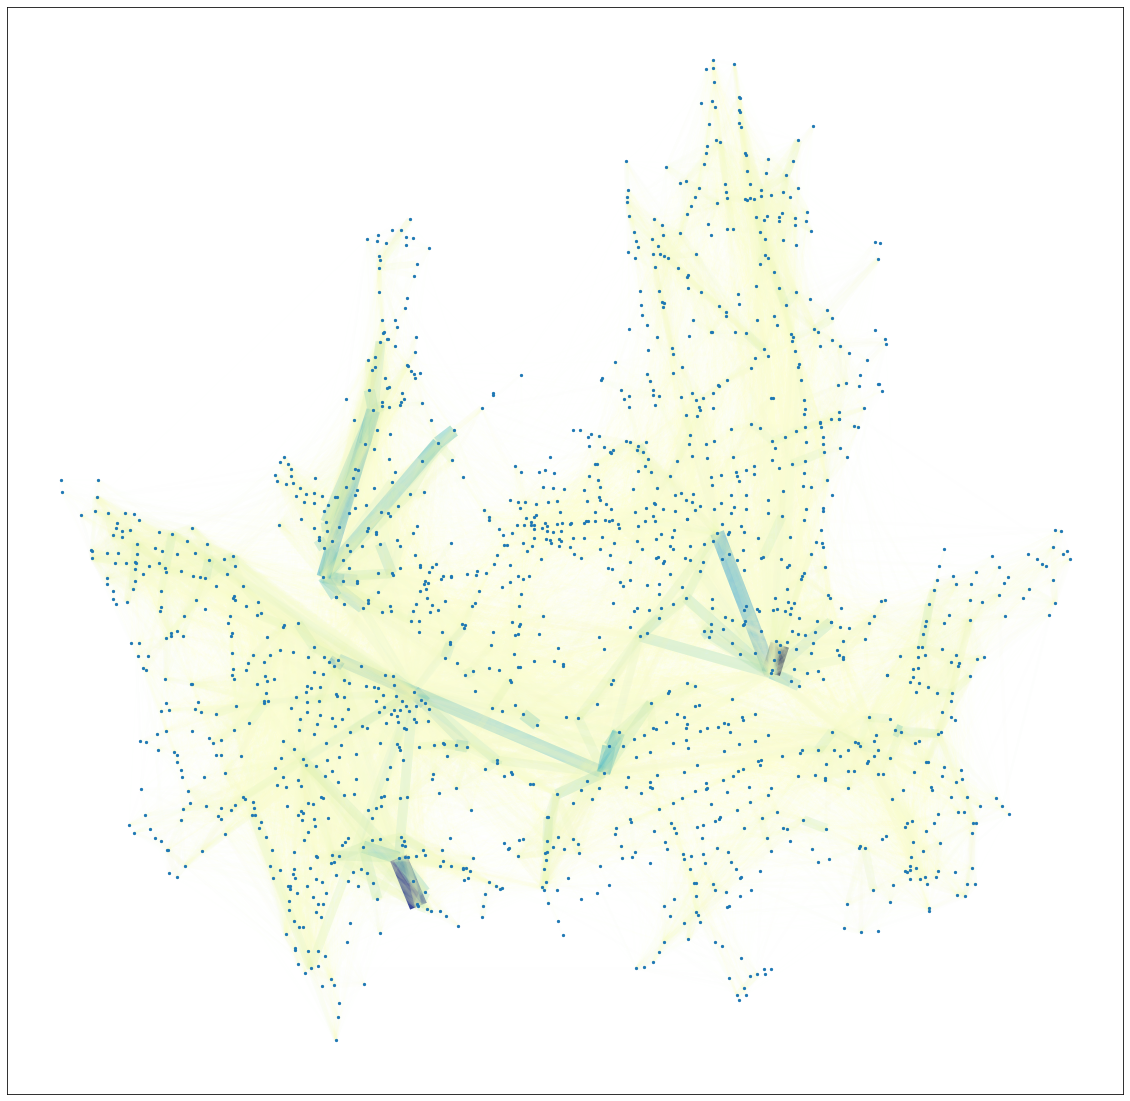

In [71]:
# 분 단위

plt.figure(figsize=(20,20))
nx.draw_networkx(rental_g, layout, node_size=5, edge_color=times, edge_cmap=map_object, width=[math.sqrt(time)*0.1 for time in times], with_labels=False, arrows=False)
plt.show()

### 이용거리 기준

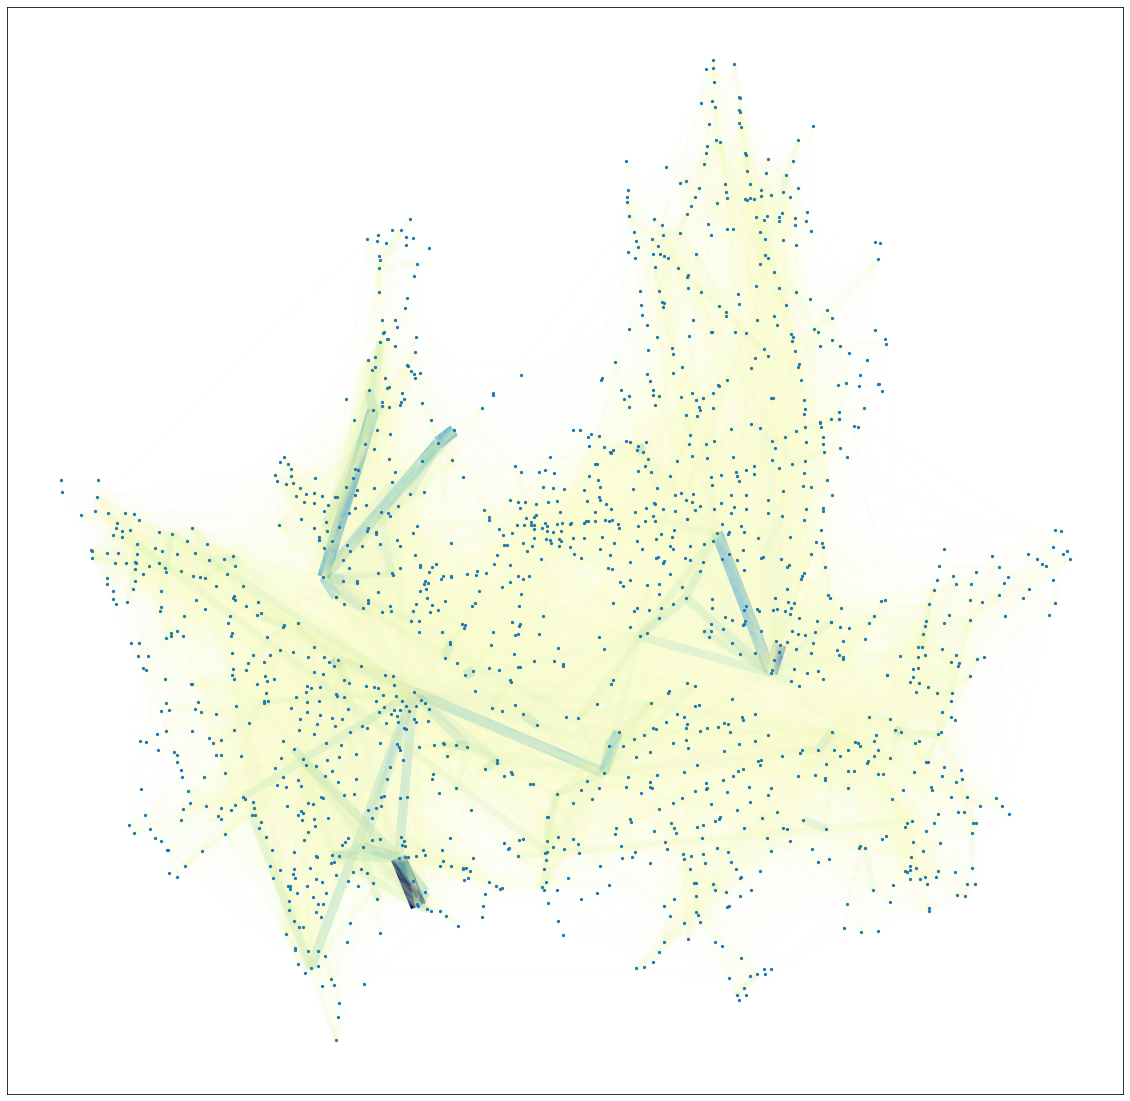

In [66]:
plt.figure(figsize=(20,20))
nx.draw_networkx(rental_g, layout, node_size=5, edge_color=distances, edge_cmap=map_object, width=[math.sqrt(distance)*0.01 for distance in distances], with_labels=False, arrows=False)
plt.show()

### 이용횟수 기준 (weight)

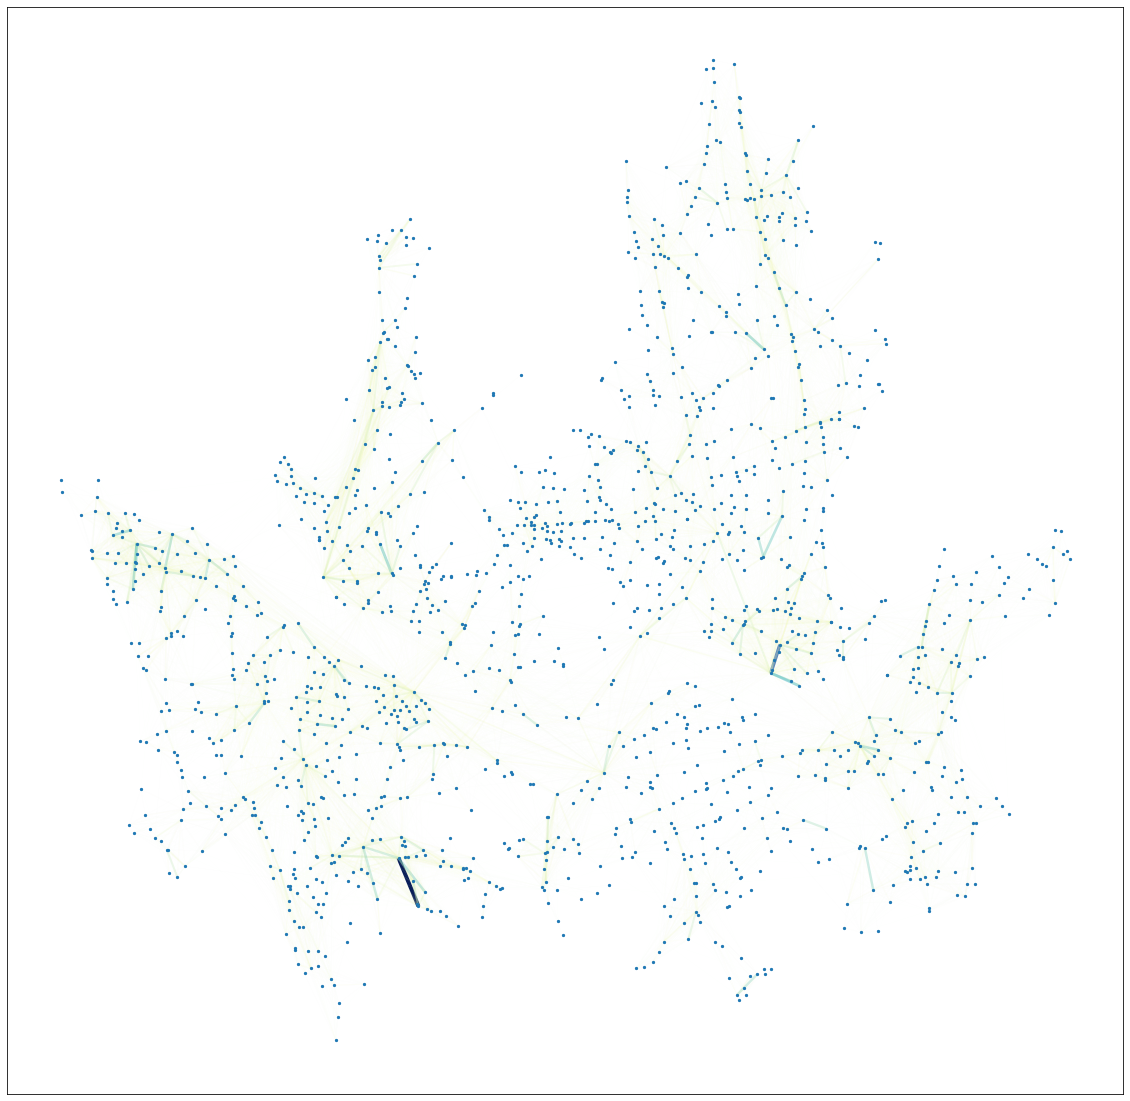

In [67]:
plt.figure(figsize=(20,20))
nx.draw_networkx(rental_g, layout, node_size=5, edge_color=weights, edge_cmap=map_object, width=[math.sqrt(weight)*0.1 for weight in weights], with_labels=False, arrows=False)
plt.show()

## Degree Distribution

In [68]:
import collections

In [72]:
def draw_degree_dist(graph, weight=None):
    
    degree_seq = []
    
    if weight=='weight':
        degree_seq = sorted([d for n,d in graph.degree(weight='weight')], reverse=True)
        # 평균 degree 계산
        print('==== weight 기준 ====')
        print('Degree 평균 : ' + str(np.mean(degree_seq)))
        print('Degree 중간값 : ' + str(np.median(degree_seq)))
        title = 'Weighted-Degree(weight)'
    elif weight=='distance':
        degree_seq = sorted([d for n,d in graph.degree(weight='distance')], reverse=True)
        # 평균 degree 계산
        print('==== distance 기준 ====')
        print('Degree 평균 : ' + str(np.mean(degree_seq)))
        print('Degree 중간값 : ' + str(np.median(degree_seq)))
        title = 'Weighted-Degree(distance)'
    elif weight=='time':
        degree_seq = sorted([d for n,d in graph.degree(weight='time')], reverse=True)
        # 평균 degree 계산
        print('==== time 기준 ====')
        print('Degree 평균 : ' + str(np.mean(degree_seq)))
        print('Degree 중간값 : ' + str(np.median(degree_seq)))
        title = 'Weighted-Degree(time)'
    elif weight==None:
        degree_seq = sorted([d for n,d in graph.degree()], reverse=True)
        print('==== 가중치 없음 ====')
        print('Degree 평균 : ' + str(np.mean(degree_seq)))
        print('Degree 중간값 : ' + str(np.median(degree_seq)))
        title = 'Degree'
    degree_cnt = collections.Counter(degree_seq)
    deg, cnt = zip(*degree_cnt.items())
    
    plt.bar(deg,cnt)
    plt.title(title)

==== 가중치 없음 ====
Degree 평균 : 184.5857142857143
Degree 중간값 : 174.5
==== weight 기준 ====
Degree 평균 : 1777.725974025974
Degree 중간값 : 1426.5
==== distance 기준 ====
Degree 평균 : 3292255.6632727277
Degree 중간값 : 2330938.785
==== time 기준 ====
Degree 평균 : 49543.08831168831
Degree 중간값 : 37275.0


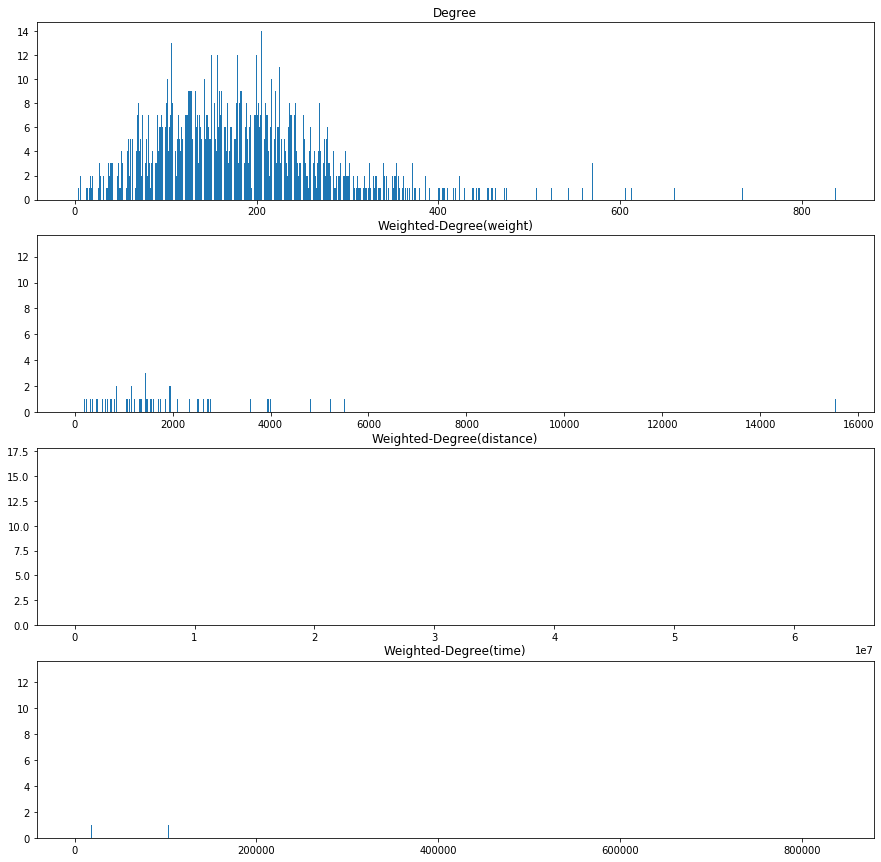

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(4,1,1)
draw_degree_dist(graph=rental_g)
plt.subplot(4,1,2)
draw_degree_dist(graph=rental_g, weight='weight')
plt.subplot(4,1,3)
draw_degree_dist(graph=rental_g, weight='distance')
plt.subplot(4,1,4)
draw_degree_dist(graph=rental_g, weight='time')
plt.show()

### Top Degree Nodes

**weighted degree(weight)**

In [138]:
source = rental_data.groupby('대여 대여소번호')['이용시간'].count().reset_index()
target = rental_data.groupby('반납대여소번호')['이용시간'].count().reset_index()
source.rename(columns={'이용시간':'out'}, inplace=True)
target.rename(columns={'이용시간':'in'}, inplace=True)
rental_deg = pd.merge(rental_point, source, how='left', left_on='대여소ID', right_on='대여 대여소번호')
rental_deg = pd.merge(rental_deg, target, how='left', left_on='대여소ID', right_on='반납대여소번호')
rental_deg = rental_deg.fillna(0)
rental_deg['total'] = rental_deg['out'] + rental_deg['in']

In [139]:
rental_deg_sorted = rental_deg.loc[np.argsort(-rental_deg.total)].reset_index(drop=True)
deg_top100 = rental_deg_sorted.loc[0:99,['대여소ID']]
deg_top100 = [v for v in deg_top100['대여소ID']]

**weighted degree(time)**

In [141]:
source_t = rental_data.groupby('대여 대여소번호')['이용시간'].sum().reset_index()
target_t = rental_data.groupby('반납대여소번호')['이용시간'].sum().reset_index()
source_t.rename(columns={'이용시간':'out'}, inplace=True)
target_t.rename(columns={'이용시간':'in'}, inplace=True)
rental_t = pd.merge(rental_point, source_t, how='left', left_on='대여소ID', right_on='대여 대여소번호')
rental_t = pd.merge(rental_t, target_t, how='left', left_on='대여소ID', right_on='반납대여소번호')
rental_t = rental_t.fillna(0)
rental_t['total'] = rental_t['out'] + rental_t['in']

In [142]:
rental_t_sorted = rental_t.loc[np.argsort(-rental_t.total)].reset_index(drop=True)
t_top100 = rental_t_sorted.loc[0:99,['대여소ID']]
t_top100 = [v for v in t_top100['대여소ID']]

**weighted degree(distance)**

In [144]:
source_d = rental_data.groupby('대여 대여소번호')['이용거리'].sum().reset_index()
target_d = rental_data.groupby('반납대여소번호')['이용거리'].sum().reset_index()
source_d.rename(columns={'이용거리':'out'}, inplace=True)
target_d.rename(columns={'이용거리':'in'}, inplace=True)
rental_d = pd.merge(rental_point, source_d, how='left', left_on='대여소ID', right_on='대여 대여소번호')
rental_d = pd.merge(rental_d, target_d, how='left', left_on='대여소ID', right_on='반납대여소번호')
rental_d = rental_d.fillna(0)
rental_d['total'] = rental_d['out'] + rental_d['in']

In [145]:
rental_d_sorted = rental_d.loc[np.argsort(-rental_d.total)].reset_index(drop=True)
d_top100 = rental_d_sorted.loc[0:99,['대여소ID']]
d_top100 = [v for v in d_top100['대여소ID']]

횟수, 이용시간, 이용거리 순

In [149]:
pd.concat([rental_deg_sorted.loc[0:9,['대여소명']],rental_t_sorted.loc[0:9,['대여소명']],rental_d_sorted.loc[0:9,['대여소명']]],axis=1)

대여소명                           대여소명  \
0              207. 여의나루역 1번출구 앞              207. 여의나루역 1번출구 앞   
1             502. 뚝섬유원지역 1번출구 앞             502. 뚝섬유원지역 1번출구 앞   
2                  2102. 봉림교 교통섬                152. 마포구민체육센터 앞   
3                152. 마포구민체육센터 앞  2219. 고속터미널역 8-1번, 8-2번 출구 사이   
4                      마곡나루역5번출구                     272. 당산육갑문   
5  2219. 고속터미널역 8-1번, 8-2번 출구 사이                  2102. 봉림교 교통섬   
6             1906. 신도림역 1번 출구 앞                583. 청계천 생태교실 앞   
7                      신대방역 2번출구                  565. 옥수역 3번출구   
8               건대입구역 사거리(롯데백화점)             1906. 신도림역 1번 출구 앞   
9              113. 홍대입구역 2번출구 앞                106. 합정역 7번출구 앞   

                            대여소명  
0              207. 여의나루역 1번출구 앞  
1             502. 뚝섬유원지역 1번출구 앞  
2                152. 마포구민체육센터 앞  
3  2219. 고속터미널역 8-1번, 8-2번 출구 사이  
4                     272. 당산육갑문  
5                  2102. 봉림교 교통섬  
6                  565. 옥수역 3번출구  
7                583. 청계천 생태교실 앞  
8             1906. 신도림역 1번 출구 앞  
9                106. 합정역 7번출구 앞

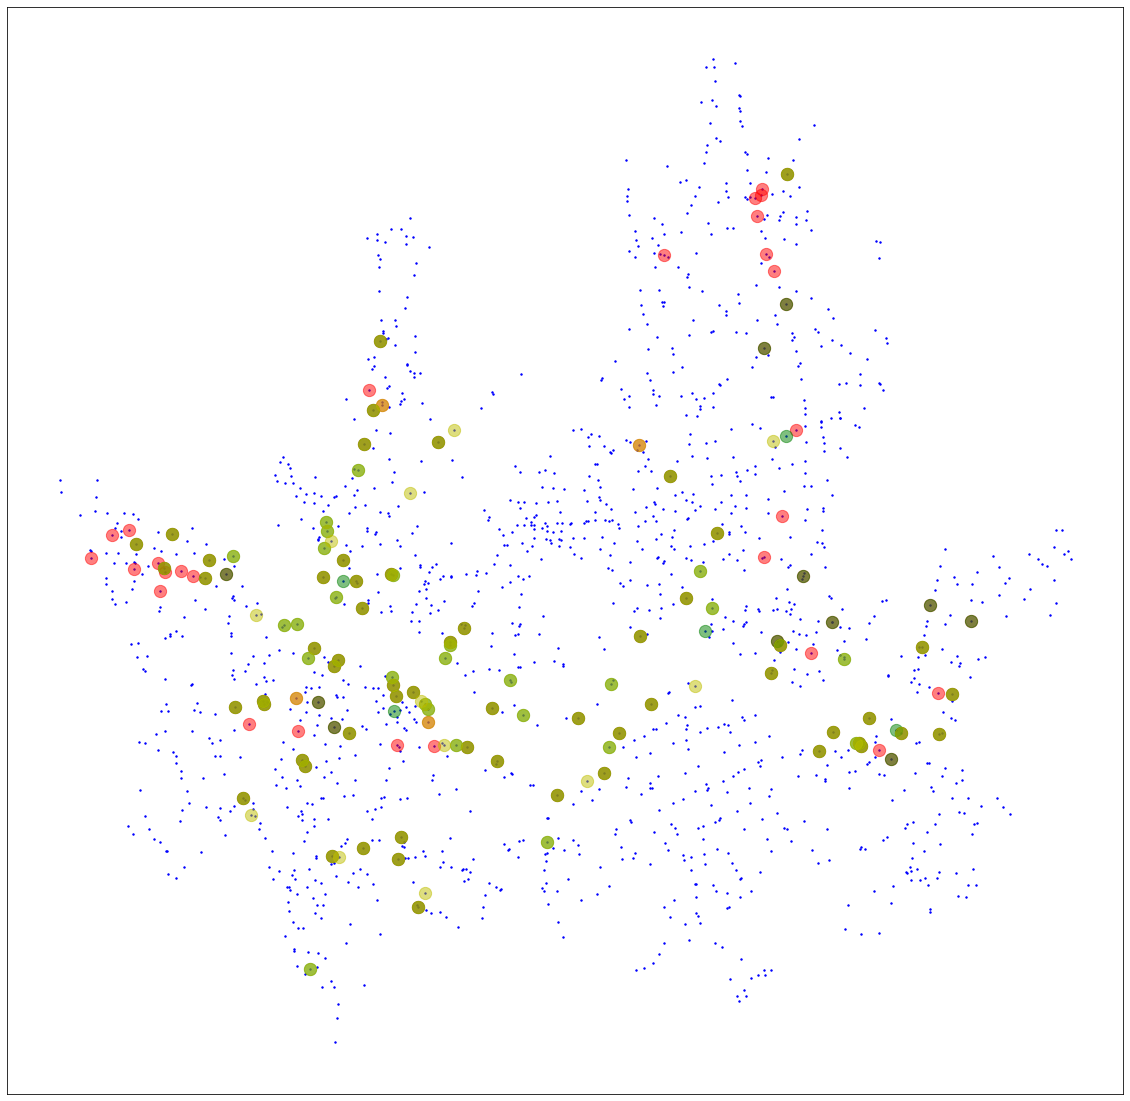

In [154]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='r', nodelist=deg_top100, node_size=150, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='g', nodelist=t_top100, node_size=150, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='y',nodelist=d_top100, node_size=150, alpha=0.5)
plt.show()

### Betweenness Centrality

In [97]:
bet = nx.betweenness_centrality(rental_g)
bet_sort = sorted(bet, key=bet.get, reverse=True)

In [166]:
# Beetweenness Centrality가 높은 10개 대여소
rental_point[rental_point['대여소ID'].isin(bet_sort[0:9])]

대여소_구  대여소ID                           대여소명                  대여소주소  \
371    성동구    565                  565. 옥수역 3번출구      서울특별시 성동구 한림말길 56   
387    성동구    583                583. 청계천 생태교실 앞    서울특별시 성동구 마장로39길 51   
524    용산구    825               825. 서빙고동 주민센터 앞     서울특별시 용산구 서빙고로 279   
528    용산구    829                     829. 베르가모앞      서울특별시 용산구 한강대로 23   
752    송파구   1209          1209. 잠실나루역 (2번 출구 쪽)       서울특별시 송파구 오금로 20   
818    송파구   1295                       잠실역 8번출구              송파구 신천동 8   
1175   동작구   2002                 2002. 노들역 1번출구  서울특별시 동작구 노량진로 지하 238   
1186   동작구   2025                 2025. 흑석역 1번출구    서울특별시 동작구 현충로 지하 90   
1278   서초구   2219  2219. 고속터미널역 8-1번, 8-2번 출구 사이  서울특별시 서초구 신반포로 지하 188   

             위도          경도            기준시작일자  거치대수  
371   37.541363  127.017662  2016-07-06 12:00    20  
387   37.567970  127.046890  2016-07-06 12:00    20  
524   37.520336  126.994263  2016-07-06 12:00    15  
528   37.522930  126.961693  2017-11-28 11:57    40  
752   37.520451  127.104202  2017-04-24 13:26    20  
818   37.513962  127.100304        2018.09.07    20  
1175  37.512844  126.952469  2017-05-12 10:56    20  
1186  37.509380  126.963615  2017-05-12 11:03    15  
1278  37.506199  127.003944  2017-06-01 10:20    20

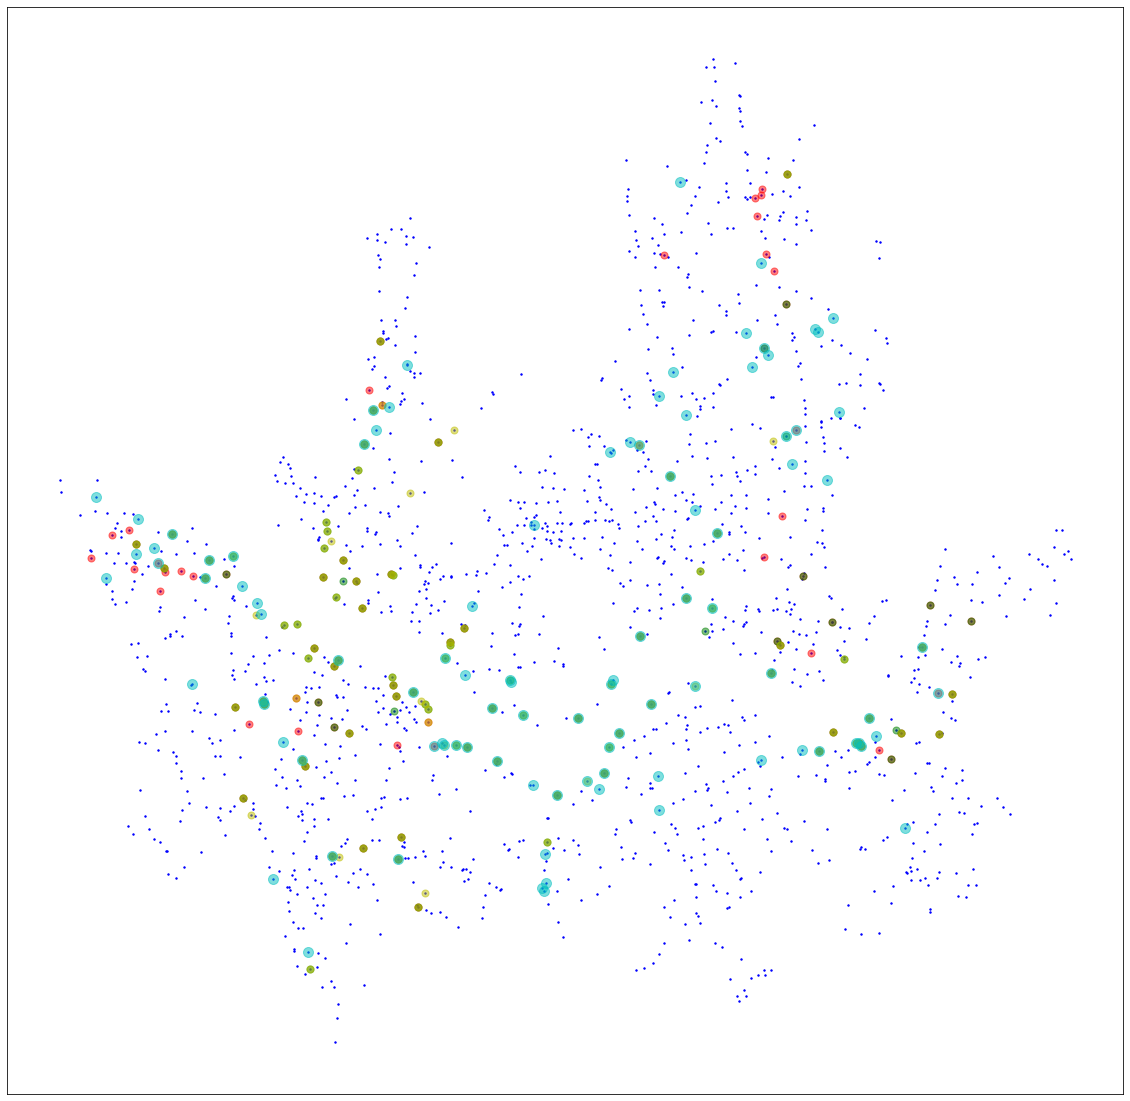

In [183]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='r', nodelist=deg_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='g', nodelist=t_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='y', nodelist=d_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='c', nodelist=rental_point[rental_point['대여소ID'].isin(bet_sort[0:99])].대여소ID, node_size=100, alpha=0.5)
plt.show()

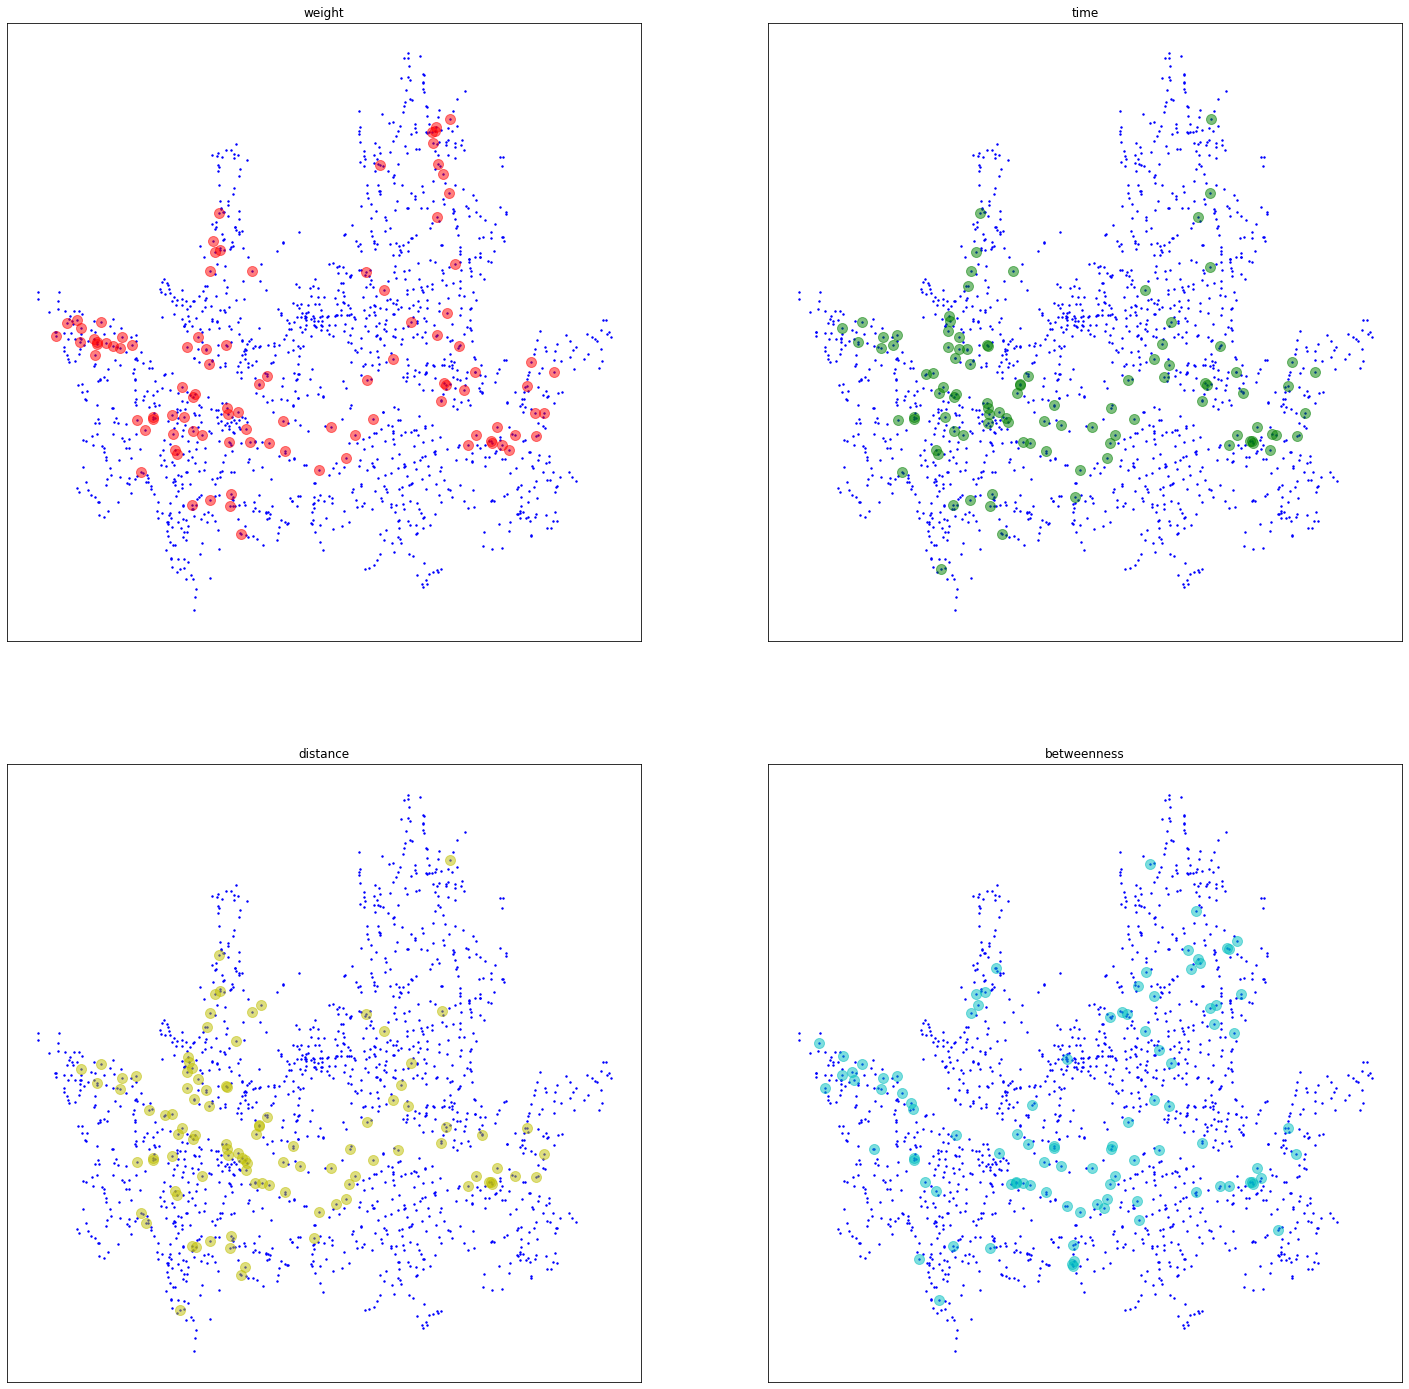

In [173]:
plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='r', nodelist=deg_top100, node_size=100, alpha=0.5)
plt.title('weight')
plt.subplot(2,2,2)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='g', nodelist=t_top100, node_size=100, alpha=0.5)
plt.title('time')
plt.subplot(2,2,3)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='y', nodelist=d_top100, node_size=100, alpha=0.5)
plt.title('distance')
plt.subplot(2,2,4)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='c', nodelist=rental_point[rental_point['대여소ID'].isin(bet_sort[0:99])].대여소ID, node_size=100, alpha=0.5)
plt.title('betweenness')
plt.show()

### PageRank Centrality

코로나는 지정학적 위치 보다는 노드의 상호작용이 중요하기 때문에, betweenness 보다는 pagerank가 더 알맞을 수도 있을 것 같아 이것으로도 분석 시도

In [174]:
pgrank = nx.pagerank(rental_g)
pgrank_sort = sorted(pgrank, key=pgrank.get, reverse=True)

In [175]:
# PageRank Centrality가 높은 10개 대여소
rental_point[rental_point['대여소ID'].isin(pgrank_sort[0:9])]

대여소_구  대여소ID              대여소명                    대여소주소         위도  \
1469   송파구   2621       한성백제역 2번 출구               송파구 방이동 11  37.516659   
1470   송파구   2622       올림픽공원역 3번출구            송파구 방이동 89-28  37.516258   
1512   광진구   3533  건대입구역 사거리(롯데백화점)          광진구 자양동 227-337  37.539139   
1515   광진구   3536         중앙농협(자양동)             광진구 자양동 730   37.531811   
1519   광진구   3541            커먼그라운드              광진구 자양동 8-6  37.545040   
1520   광진구   3542      래미안 구의파크 스위트           광진구 구의동 229-23  37.545040   
1533   구로구   2801         대륭포스트타워1차         구로구 디지털로31길 33-1  37.484371   
1536   관악구   2185           대학동 고시촌     서울특별시 관악구 신림로 97 밀라트  37.470467   
1537   서초구   2265   2265. 이수고가차도 남단  서울특별시 서초구 동작대로 204 청남빌딩  37.494743   

              경도            기준시작일자  거치대수  
1469  127.116257        2018.11.14    15  
1470  127.130592        2018.11.14    20  
1512  127.070618        2018.10.29    10  
1515  127.080742        2018.10.29    10  
1519  127.089958        2018.11.14    17  
1520  127.089958        2018.11.14    17  
1533  126.895424        2019.07.18    30  
1536  126.938652        2019.09.26    10  
1537  126.983063  2017-08-09 11:16    10

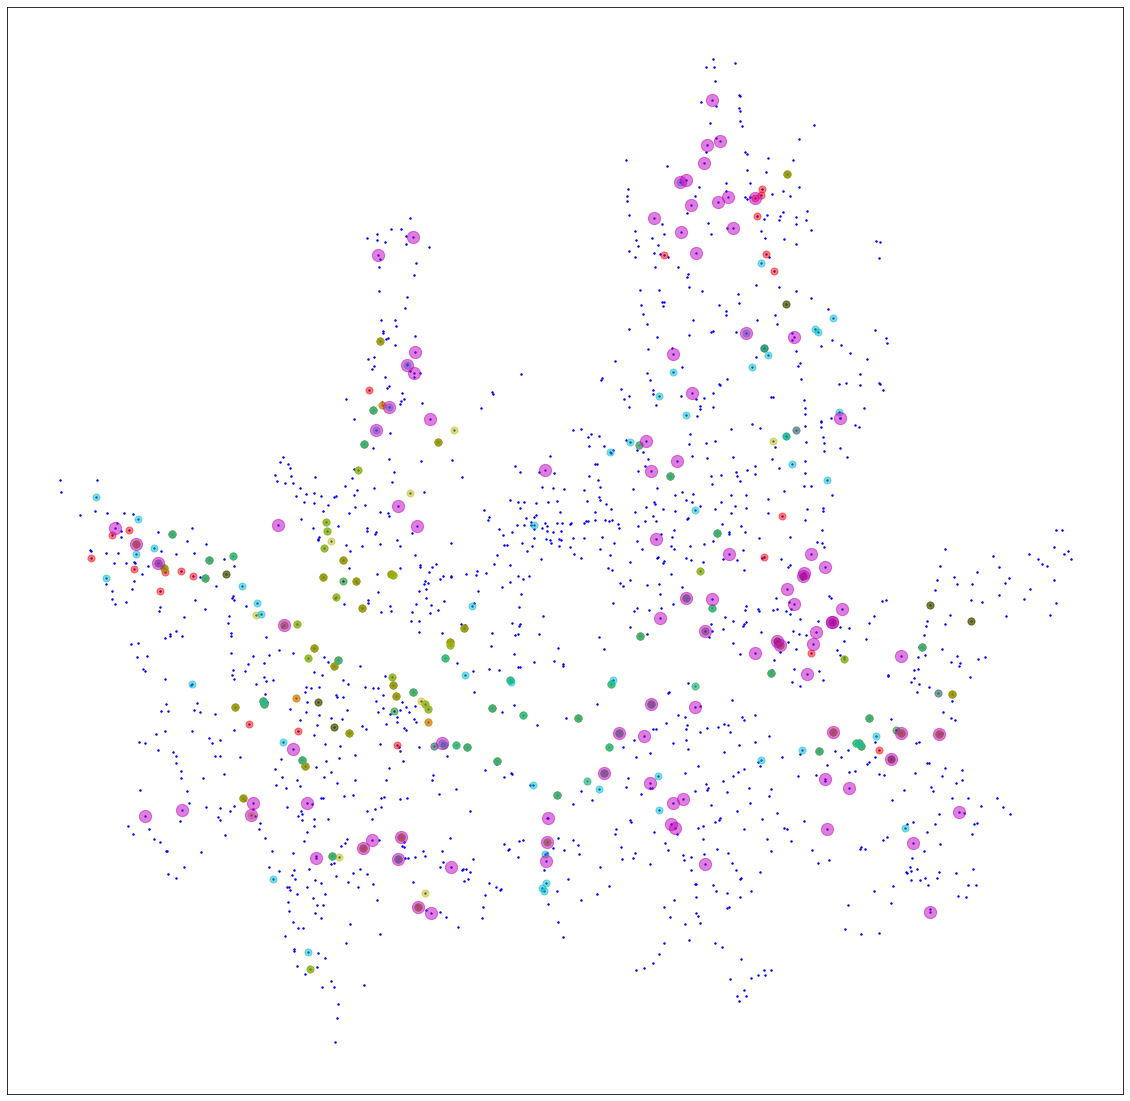

In [187]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='r', nodelist=deg_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='g', nodelist=t_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='y', nodelist=d_top100, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='c', nodelist=rental_point[rental_point['대여소ID'].isin(bet_sort[0:99])].대여소ID, node_size=50, alpha=0.5)
nx.draw_networkx_nodes(rental_g, layout, node_color='m', nodelist=rental_point[rental_point['대여소ID'].isin(pgrank_sort[0:99])].대여소ID, node_size=150, alpha=0.5)
plt.show()

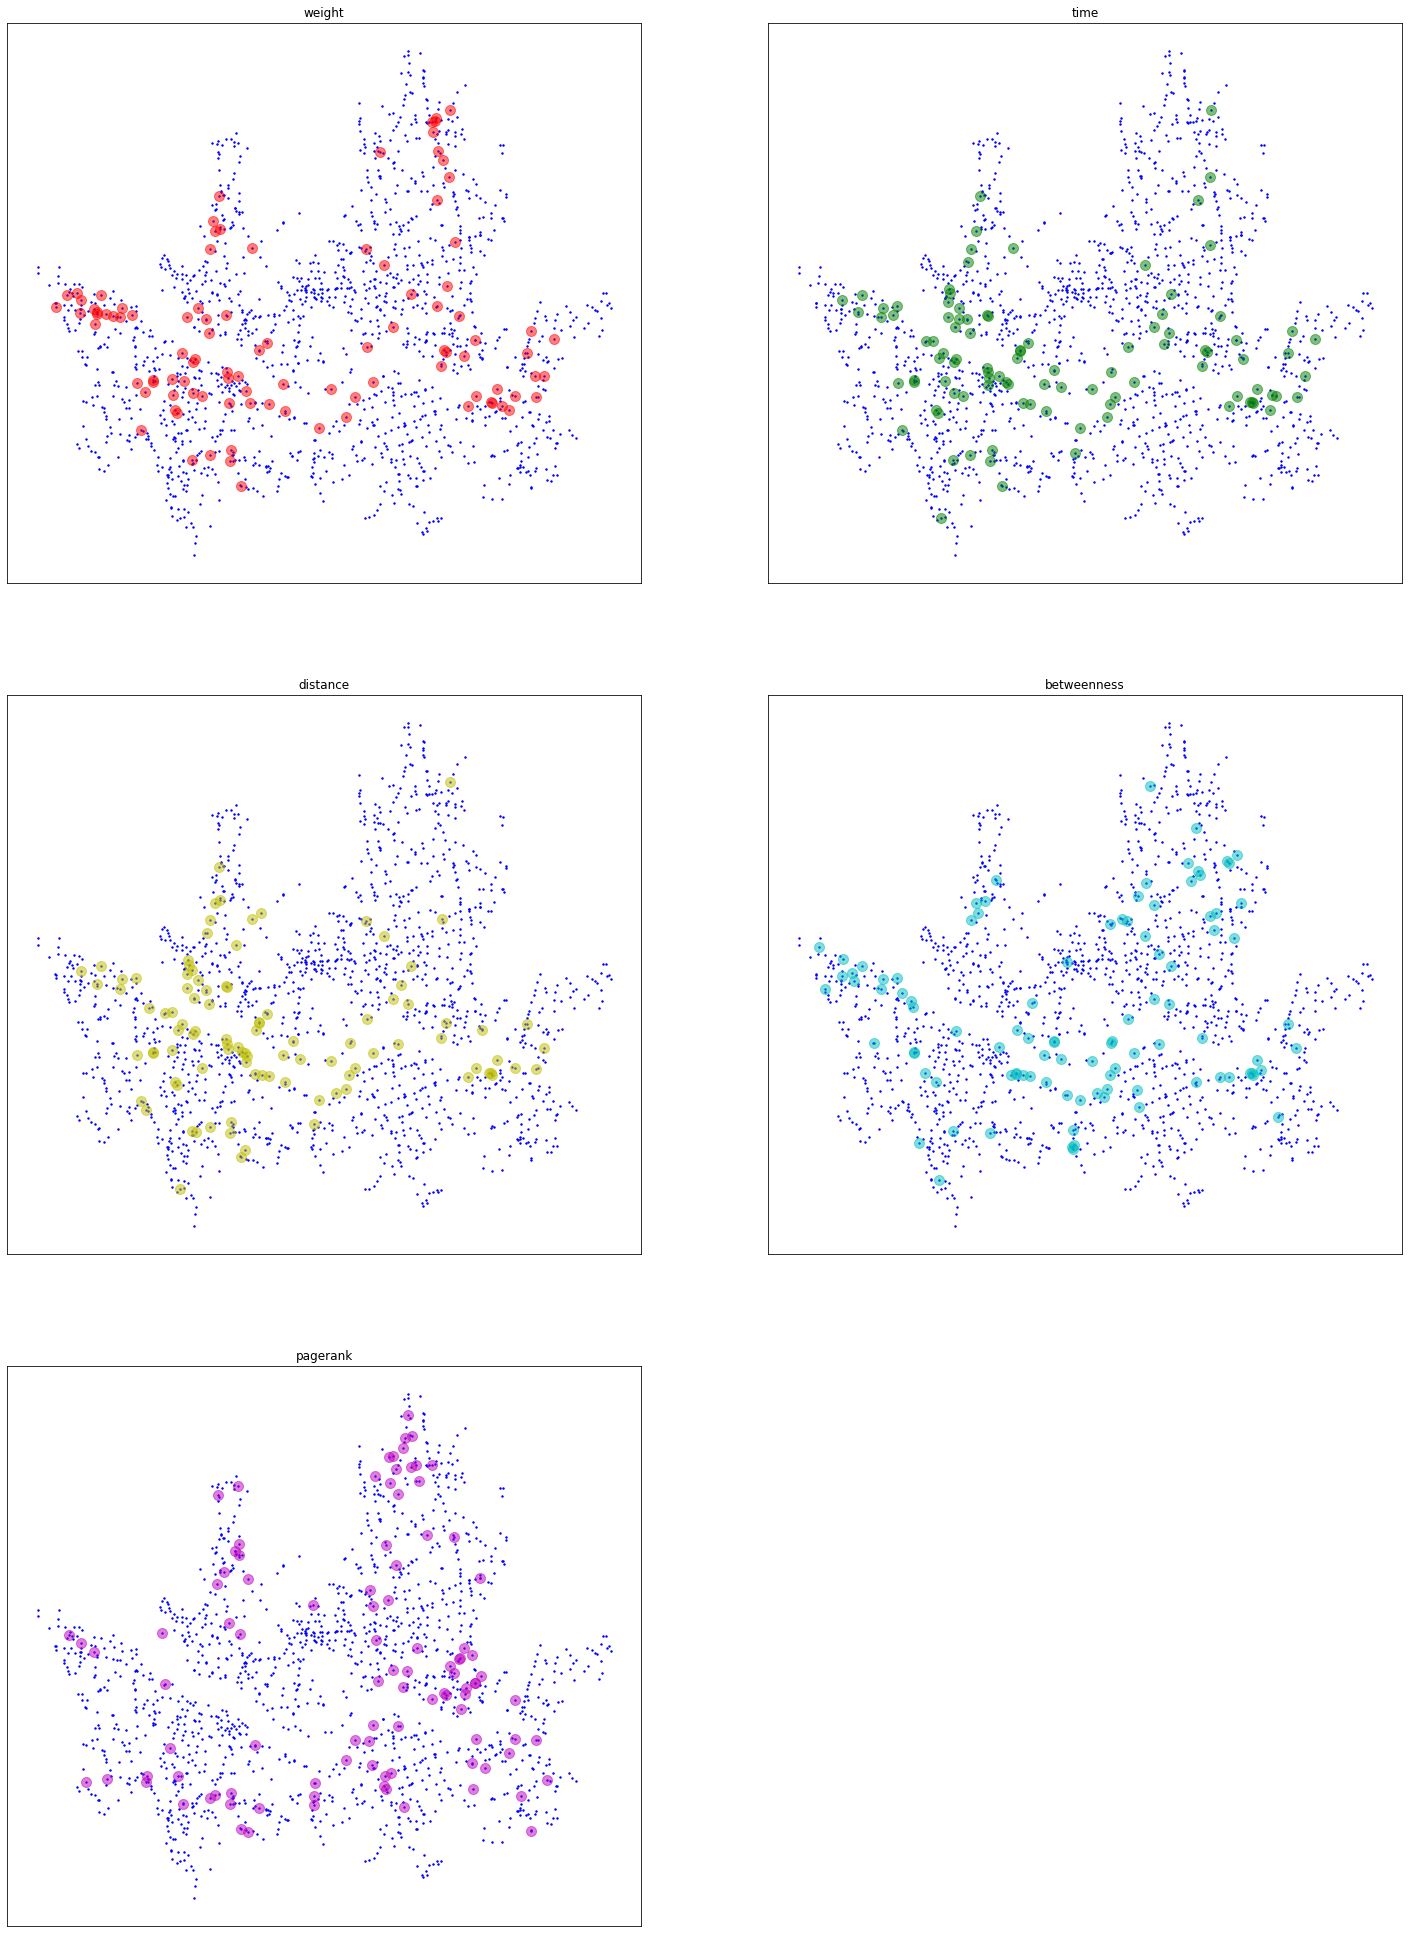

In [190]:
plt.figure(figsize=(25,35))
plt.subplot(3,2,1)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='r', nodelist=deg_top100, node_size=100, alpha=0.5)
plt.title('weight')
plt.subplot(3,2,2)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='g', nodelist=t_top100, node_size=100, alpha=0.5)
plt.title('time')
plt.subplot(3,2,3)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='y', nodelist=d_top100, node_size=100, alpha=0.5)
plt.title('distance')
plt.subplot(3,2,4)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='c', nodelist=rental_point[rental_point['대여소ID'].isin(bet_sort[0:99])].대여소ID, node_size=100, alpha=0.5)
plt.title('betweenness')
plt.subplot(3,2,5)
nx.draw_networkx_nodes(rental_g, layout, node_color='b',node_size=2)
nx.draw_networkx_nodes(rental_g, layout, node_color='m', nodelist=rental_point[rental_point['대여소ID'].isin(pgrank_sort[0:99])].대여소ID, node_size=100, alpha=0.5)
plt.title('pagerank')
plt.show()